In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [31]:
DS=pd.read_csv("data_set.csv")
DS.sample(3)

,Category,Message
3799,ham,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to..."
1450,ham,say thanks2.
219,ham,I have to take exam with march 3


In [5]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:

# dimension of dataset
print(DS.shape)

(5572, 2)


In [17]:
# Number of non empty records in a record
DS.count

<bound method DataFrame.count of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [18]:
DS.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [22]:
# display categorical data
DS['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [26]:
# show proportion of categorical data
DS['Category'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

ham     0.865937
spam    0.134063
Name: Category, dtype: float64


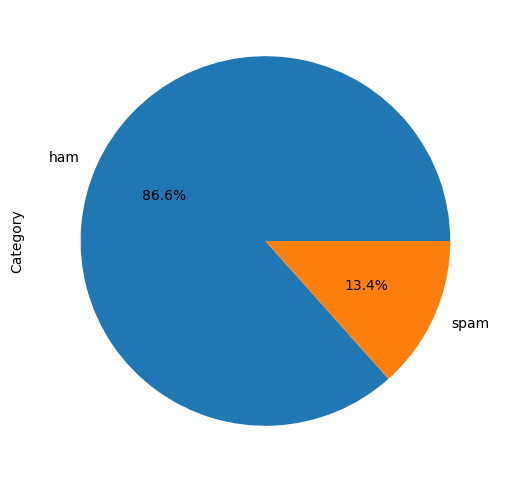

<Figure size 640x480 with 0 Axes>

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
prop= DS.Category.value_counts(normalize=True)
print(prop)
prop.plot(kind="pie",figsize=(6,6),autopct='%1.1f%%')
plt.show()

In [3]:
data={'degree':[
    'bachelor',
    'phd',
    'masters',
    'bachelor',
    'phd',
    'masters']}
tabular_data=pd.DataFrame(data)
print(tabular_data)

     degree
0  bachelor
1       phd
2   masters
3  bachelor
4       phd
5   masters


In [26]:
import category_encoders as ce
# We have imported a module that we use to encode our data ordinally as follows or using one-hot encoding

In [27]:
encoder= ce.OrdinalEncoder(cols=['degree'],mapping=[{'col':'degree', # We are creating an object that we use to encode different data sets based on our mapping
                                                'mapping':{
                                                    'none':0,
                                                    'bachelor':1, 
                                                    'masters':2,
                                                    'phd':3
                                                }}])
# the cols is for the name of the column and the mapping is the numerical value of the unique data items we have
# We use this numerical ordinal encoding of our data so that it is easier for our machione to read and understand the given data
# and I believe it saves us time as well
encoded_data=encoder.fit_transform(tabular_data) # Using the 'encoder' encoding object we have created, we are transforming our tabular data in an encoded tabular data
encoded_data

,degree
0,1
1,3
2,2
3,1
4,3
5,2


In [20]:
colors={'color':[
    'green',
    'yellow',
    'red',
    'pink',
    'black'
]}

color_tabular=pd.DataFrame(colors)
color_tabular

,color
0,green
1,yellow
2,red
3,pink
4,black


In [29]:
color_one_hot_encoder=ce.OneHotEncoder(cols='color',use_cat_names=True)
color_one_hot_encoded=color_one_hot_encoder.fit_transform(color_tabular)
color_one_hot_encoded

c:\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


,color_green,color_yellow,color_red,color_pink,color_black
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [35]:
# Since our dataset for the email spam detector is nominal data set, we use one hot encoding
DS_encoder=ce.OneHotEncoder(cols='Category',use_cat_names=True)
DS_one_hot_encoded=DS_encoder.fit_transform(DS)
DS_one_hot_encoded.sample(3)

c:\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


,Category_ham,Category_spam,Message
673,0,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
2510,1,0,U wake up already? Wat u doing? U picking us u...
4736,1,0,Oh k:)after that placement there ah?


In [44]:
# From the above table we can see that the values 0 and 1 are just dummy variables signifying if it is a spam or a ham
# but we can inherently define if a message is a spam or or not from the value of a ham, and vice versa
# This case is called dummy_variable_trap

# To avoid this we can drop one of the category features which is 'ham' in this case
# to do that 
DS_one_hot_encoded_dropped_ham=DS_one_hot_encoded.drop(['Category_ham'],axis=1)
DS_one_hot_encoded_dropped_ham.sample(3)

,Category_spam,Message
4861,0,Response is one of d powerful weapon 2 occupy ...
5313,0,My sister going to earn more than me da.
4411,0,You also didnt get na hi hi hi hi hi
